# STA 141B: Homework 5
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:Rick

Last Name: Alarcon

Student ID: 914314280

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Housing data

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ (20 pts) Which mobile food vendor(s) sells at the most locations?

In [66]:
import sqlite3 as sql
data = sql.connect('sf_data.sqlite')
#cursor is a pointer s a pointer to the results in the database (imagine a finger pointing at the results).
cursor = data.execute("SELECT * FROM sqlite_master ") 
#SQLite databases store metadata in a special table called : sqlite_master
#we can use "sqlite_master" to find out the names of the other tables in the database.
cursor.fetchall()



[('table',
  'crime',
  'crime',
  2,
  'CREATE TABLE "crime" (\n"IncidntNum" INTEGER,\n  "Category" TEXT,\n  "Descript" TEXT,\n  "DayOfWeek" TEXT,\n  "Datetime" TIMESTAMP,\n  "PdDistrict" TEXT,\n  "Resolution" TEXT,\n  "Address" TEXT,\n  "Lon" REAL,\n  "Lat" REAL\n)'),
 ('table',
  'noise',
  'noise',
  35775,
  'CREATE TABLE "noise" (\n"CaseID" INTEGER,\n  "Type" TEXT,\n  "Address" TEXT,\n  "Neighborhood" TEXT,\n  "Datetime" TIMESTAMP,\n  "Lat" REAL,\n  "Lon" REAL\n)'),
 ('table',
  'parking',
  'parking',
  35921,
  'CREATE TABLE "parking" (\n"Owner" TEXT,\n  "Address" TEXT,\n  "PrimeType" TEXT,\n  "SecondType" TEXT,\n  "GarOrLot" TEXT,\n  "RegCap" INTEGER,\n  "ValetCap" INTEGER,\n  "MCCap" INTEGER,\n  "LandType" TEXT,\n  "Lat" REAL,\n  "Lon" REAL\n)'),
 ('table',
  'schools',
  'schools',
  35944,
  'CREATE TABLE "schools" (\n"Name" TEXT,\n  "Entity" TEXT,\n  "LowerGrade" INTEGER,\n  "UpperGrade" INTEGER,\n  "GradeRange" TEXT,\n  "Category" TEXT,\n  "LowerAge" INTEGER,\n  "UpperAge

In [67]:
#By default, sqlite3 will return rows as tuples. If you'd rather have the rows as dictionaries
#indexed by column name, set the .row_factory attribute on the database connection.
data.row_factory = sql.Row
cursor = data.execute("SELECT * FROM sqlite_master")
rows = cursor.fetchall() # rows is a list of 9 TABLES!
rows
rows[0].keys()           #[0] access first TABLE!, and we get their keys

['type', 'name', 'tbl_name', 'rootpage', 'sql']

In [68]:
data.close() #Closing the database to create the tables

In [69]:
import sqlite3 as sql
import pandas as pd
data = sql.connect('sf_data.sqlite')
pd.read_sql("SELECT * FROM sqlite_master",data)

,type,name,tbl_name,rootpage,sql
0,table,crime,crime,2,"CREATE TABLE ""crime"" (\n""IncidntNum"" INTEGER,\..."
1,table,noise,noise,35775,"CREATE TABLE ""noise"" (\n""CaseID"" INTEGER,\n ""..."
2,table,parking,parking,35921,"CREATE TABLE ""parking"" (\n""Owner"" TEXT,\n ""Ad..."
3,table,schools,schools,35944,"CREATE TABLE ""schools"" (\n""Name"" TEXT,\n ""Ent..."
4,table,parks,parks,35961,"CREATE TABLE ""parks"" (\n""Name"" TEXT,\n ""Type""..."
5,table,zillow,zillow,35967,"CREATE TABLE ""zillow"" (\n""RegionName"" INTEGER,..."
6,table,mobile_food_permits,mobile_food_permits,36050,"CREATE TABLE ""mobile_food_permits"" (\n""permit""..."
7,table,mobile_food_locations,mobile_food_locations,36060,"CREATE TABLE ""mobile_food_locations"" (\n""locat..."
8,table,mobile_food_schedule,mobile_food_schedule,36079,"CREATE TABLE ""mobile_food_schedule"" (\n""locati..."


In [70]:
#Which mobile food vendor(s) sells at the most locations?
mobile_schedule=pd.read_sql("SELECT * FROM mobile_food_schedule LIMIT 5 ",data) #mob_sche has 3592 rows
mobile_schedule

,locationid,permit,DayOfWeek,EndHour,StartHour
0,305727,11MFF-0040,Mo,15,10
1,305727,11MFF-0040,Tu,15,10
2,305727,11MFF-0040,We,15,10
3,305727,11MFF-0040,Th,15,10
4,305727,11MFF-0040,Fr,15,10


In [71]:
mobile_permits=pd.read_sql("SELECT * FROM mobile_food_permits LIMIT 5  ",data) # mob_perm HAVE 195 ROWS
mobile_permits

,permit,Status,Applicant,FacilityType,FoodItems,PriorPermit,Approved,Expiration
0,16MFF-0027,APPROVED,F & C Catering,Truck,Cold Truck: Hot/Cold Sandwiches: Water: Soda: ...,1,2016-03-09 12:00:00,2017-03-15 12:00:00
1,13MFF-0102,EXPIRED,Natan's Catering,Truck,Burgers: melts: hot dogs: burritos:sandwiches:...,1,2013-04-12 12:00:00,2014-03-15 12:00:00
2,16MFF-0069,APPROVED,Munch A Bunch,Truck,Cold Truck: packaged sandwiches: pitas: breakf...,1,2016-03-15 12:00:00,2017-03-15 12:00:00
3,16MFF-0051,APPROVED,Park's Catering,Truck,Cold Truck: Hamburger: cheeseburgers: hot dogs...,1,2016-03-15 12:00:00,2017-03-15 12:00:00
4,16MFF-0010,REQUESTED,Pipo's Grill,Truck,Tacos: Burritos: Hot Dogs: and Hamburgers,0,None,None


In [72]:
# I USED LEFT JOIN TO TAKE ALL THE LOCATIONS FROM MOL_SCHEDULE
#THEN I WILL CREATE A FREQUENCY TABLE FOR THE APPLICANTS
#AND SEE HOW MANY TIMES THEY VISIT TO THE LOCATIONS
inner = pd.read_sql( """
SELECT l.locationid,l.permit, r.Applicant
FROM mobile_food_schedule as l
LEFT JOIN mobile_food_permits as r
ON l.permit = r.permit
""",data)
inner.dropna()

,locationid,permit,Applicant
0,305727,11MFF-0040,Bombay Blvd.
1,305727,11MFF-0040,Bombay Blvd.
2,305727,11MFF-0040,Bombay Blvd.
3,305727,11MFF-0040,Bombay Blvd.
4,305727,11MFF-0040,Bombay Blvd.
5,305727,11MFF-0040,Bombay Blvd.
6,305727,11MFF-0040,Bombay Blvd.
7,305727,11MFF-0040,Bombay Blvd.
8,305727,11MFF-0040,Bombay Blvd.
9,305727,11MFF-0040,Bombay Blvd.


In [73]:
#CREATING FREQUENCY TO FIND WHICH FOOD VENDORS WENT TO MOST LOCATIONS
Frequency= pd.value_counts(inner['Applicant'])
type(Frequency)
Frequency.rename('Frequency Table')
Frequency

May Catering                                                               340
Natan's Catering                                                           221
Anas Goodies Catering                                                      212
Liang Bai Ping                                                             182
Mang Hang Catering                                                         165
Park's Catering                                                            134
Steve's Mobile Deli                                                        125
John's Catering #5                                                         120
Singh Brothers Ice Cream                                                   105
Sun Rise Catering                                                          100
Two G's Catering                                                            98
M M Catering                                                                96
Quan Catering                                       

__Exercise 1.2.__ (40 pts) Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import fiona
import geopandas as gpd         # conda install -c conda-forge geopandas
import osmnx as ox              # conda install -c conda-forge osmnx
import shapely.geometry as geom # conda install -c conda-forge shapely

In [75]:
fiona.supported_drivers


{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [76]:

data = sql.connect('sf_data.sqlite')
pd.read_sql("SELECT * FROM zillow LIMIT 10",data)

,RegionName,Date,ZriPerSqft_AllHomes,MedianSoldPricePerSqft_AllHomes,PriceToRentRatio_AllHomes,Turnover_AllHomes
0,94109,2010-11-01 00:00:00,3.156,675.1913,19.14,6.0771
1,94110,2010-11-01 00:00:00,2.566,599.6785,18.10,5.4490
2,94122,2010-11-01 00:00:00,2.168,495.4432,17.99,2.4198
3,94080,2010-11-01 00:00:00,1.666,369.5538,18.31,3.8757
4,94112,2010-11-01 00:00:00,2.322,422.4538,14.44,3.1288
5,94115,2010-11-01 00:00:00,3.000,667.1225,20.17,4.9020
6,94117,2010-11-01 00:00:00,2.556,751.9414,20.04,4.4494
7,94121,2010-11-01 00:00:00,2.170,500.4239,18.84,3.0160
8,94102,2010-11-01 00:00:00,3.212,NaN,15.35,6.6625
9,94118,2010-11-01 00:00:00,2.448,578.9903,NaN,3.9754


In [77]:
region_prices=pd.read_sql("""
SELECT RegionName,MedianSoldPricePerSqft_AllHomes
FROM zillow
WHERE MedianSoldPricePerSqft_AllHomes IS NOT NULL
GROUP BY RegionName
ORDER BY MedianSoldPricePerSqft_AllHomes

""",data)

In [78]:
#Create graph
import seaborn as sns
from matplotlib import pyplot as plt
#region_prices
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

region_prices_sorted=region_prices.sort_values( by= "MedianSoldPricePerSqft_AllHomes",inplace= False, na_position="last")


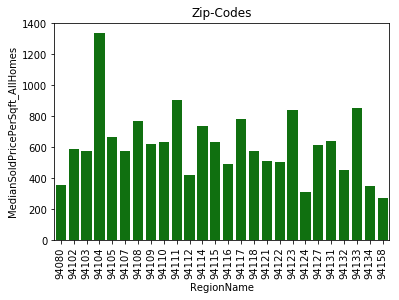

In [79]:
#GENERATING THE PLOT WITH SNS
plot=sns.barplot(x="RegionName", y="MedianSoldPricePerSqft_AllHomes",data=region_prices_sorted,color="green")
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Zip-Codes")
plt.show()

In [80]:
#Looking for the highest and lowest prices
highprice =region_prices_sorted.iloc[:3]
lowprice  =region_prices_sorted.iloc[-3:]
high_low_price_dataframe=highprice.append(lowprice)
high_low_price_dataframe

,RegionName,MedianSoldPricePerSqft_AllHomes
0,94158,273.033708
1,94124,312.412600
2,94134,351.758200
23,94133,850.666667
24,94111,901.804100
25,94104,1336.128581


In [81]:
#########GEOPANDAS MAP#############
import matplotlib.pyplot as plt
import pandas as pd
import fiona
import geopandas as gpd     
import osmnx as ox              
import shapely.geometry as geom 
import os 

os.getcwd()
zipcodes=gpd.read_file('/Users/macbook/STA141B/141b-hw5--rickalarcon/cb_2016_us_zcta510_500k/cb_2016_us_zcta510_500k.shp')
zipcodes.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [82]:
#we take the zip codes only of san francisco
SF_codes=zipcodes[zipcodes.ZCTA5CE10.str.startswith("9")]
SF_codes.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
25,97365,8600000US97365,97365,109806917,6824094,"POLYGON ((-124.079249 44.6772, -124.0774751021..."
26,97862,8600000US97862,97862,711973557,47030,"POLYGON ((-118.6983 45.93671399999999, -118.69..."
42,98146,8600000US98146,98146,12047560,1758214,"POLYGON ((-122.39586529922 47.51376729164519, ..."
55,99574,8600000US99574,99574,6406176482,768254012,"(POLYGON ((-145.731377 60.62051, -145.729119 6..."
56,99830,8600000US99830,99830,703636442,421008566,"(POLYGON ((-133.797239 56.810756, -133.791772 ..."


In [83]:
#from internet this helped me a lot
#region_prices_sorted is variable too
wanted = [str(x) for x in region_prices_sorted["RegionName"].values]
SF_codes = SF_codes.loc[SF_codes["ZCTA5CE10"].isin(set(wanted))]
SF_codes.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
102,94102,8600000US94102,94102,1732307,0,"POLYGON ((-122.429929 37.777909, -122.426829 3..."
1041,94116,8600000US94116,94116,6699045,97204,"POLYGON ((-122.510297 37.764073, -122.509833 3..."
1499,94158,8600000US94158,94158,1703879,1342698,"POLYGON ((-122.397866 37.772323, -122.396381 3..."
1893,94117,8600000US94117,94117,4373059,1625,"POLYGON ((-122.477297 37.766069, -122.473124 3..."
2312,94104,8600000US94104,94104,200857,0,"POLYGON ((-122.404613 37.793565, -122.401315 3..."


In [84]:
SF_codes["RegionName"] = SF_codes["ZCTA5CE10"]  #same as table above 
SF_codes= SF_codes.reset_index().sort_values(by = "RegionName")
SF_codes

,index,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,RegionName
20,29452,94080,8600000US94080,94080,26636696,282925,"POLYGON ((-122.469009 37.650404, -122.458997 3...",94080
0,102,94102,8600000US94102,94102,1732307,0,"POLYGON ((-122.429929 37.777909, -122.426829 3...",94102
10,9355,94103,8600000US94103,94103,3518316,0,"POLYGON ((-122.426418 37.765784, -122.426402 3...",94103
4,2312,94104,8600000US94104,94104,200857,0,"POLYGON ((-122.404613 37.793565, -122.401315 3...",94104
21,29455,94105,8600000US94105,94105,952915,208000,"POLYGON ((-122.403456 37.787776, -122.401939 3...",94105
22,29456,94107,8600000US94107,94107,4643461,236640,"POLYGON ((-122.40509 37.76462799999999, -122.4...",94107
7,7927,94108,8600000US94108,94108,698155,0,"POLYGON ((-122.414826 37.794988, -122.404412 3...",94108
23,29457,94109,8600000US94109,94109,3077741,295388,"POLYGON ((-122.432565 37.80848, -122.432079 37...",94109
5,7435,94110,8600000US94110,94110,6019920,12207,"POLYGON ((-122.426722 37.736372, -122.425082 3...",94110
8,7928,94111,8600000US94111,94111,891133,494314,"POLYGON ((-122.405922 37.806462, -122.403494 3...",94111


In [85]:
SF_codes["RegionName"] = SF_codes["ZCTA5CE10"]  

##### Which parts of the city are the most dangerous (and at what times)? ######

In [128]:
# SQLITE THAT CONTEIN THE TABLES


In [87]:
crimes = pd.read_sql("SELECT * from crime", data)
#Check dataa structure
print(crimes.shape)
crimes.iloc[0:10,]

(1033401, 10)


,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27 19:00:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469
5,150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,2015-02-01 16:21:00,RICHMOND,NONE,400 Block of LOCUST ST,-122.451782,37.787085
6,150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,2015-01-31 21:00:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203
7,150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,2015-01-31 21:00:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203
8,150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,2015-01-31 16:09:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406568,37.787809
9,150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,2015-01-31 17:00:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295,37.786258


In [88]:
districts = gpd.read_file("geo_export_4b461642-852d-461c-b4a6-2ed6cddfe153.shp")
districts.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,POLYGON ((-122.4934552679999 37.78351817100008...
1,None,Lake Street,POLYGON ((-122.4871507149999 37.78378542700005...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,POLYGON ((-122.4775801709999 37.81099311300005...
3,None,Presidio Terrace,POLYGON ((-122.4724105299999 37.78734653900005...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,POLYGON ((-122.4726257899999 37.78631480600006...


In [129]:
from shapely.geometry import Point, Polygon
crimes = crimes.iloc[0:50000,]
lnglat = [geom.Point(x) for x in zip(crimes.Lon, crimes.Lat)]
crimes = gpd.GeoDataFrame(crimes, geometry = lnglat)
distnames = []
found = False
for point in crimes["geometry"]:
    for j in range(len(districts["geometry"])):
        if(districts["geometry"].iloc[j,].contains(point)):
            distnames.append(districts["name"].iloc[j,])
            found = True
            break
    if(found == True):
        found = False
    else:
        distnames.append("None") 
print(len(distnames))
crimes["district"] = distnames
crimes.head()

49649


,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat,geometry,district
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,POINT (-122.42158168137 37.7617007179518),Mission Dolores
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,POINT (-122.414406029855 37.7841907151119),Tenderloin
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,POINT (-122.414406029855 37.7841907151119),Tenderloin
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,POINT (-122.414406029855 37.7841907151119),Tenderloin
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27 19:00:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,POINT (-122.431118543788 37.8004687042875),Marina


In [134]:
crimes = crimes[crimes["district"] != "None"]
crimeFre = crimes.groupby(['district'], as_index= False).count()
crimeFre = crimeFre[["district", "IncidntNum"]]
crimeFre.rename(columns={"IncidntNum": "Frequency"}, inplace = True)
crimeFre.sort_values(by="Frequency", ascending=False, inplace=True)
crimeFrequency =crimeFre
crimeFrequency.head()

,district,Frequency
97,South of Market,5834
64,Mission,4578
105,Tenderloin,4219
16,Civic Center,2074
25,Downtown / Union Square,1874


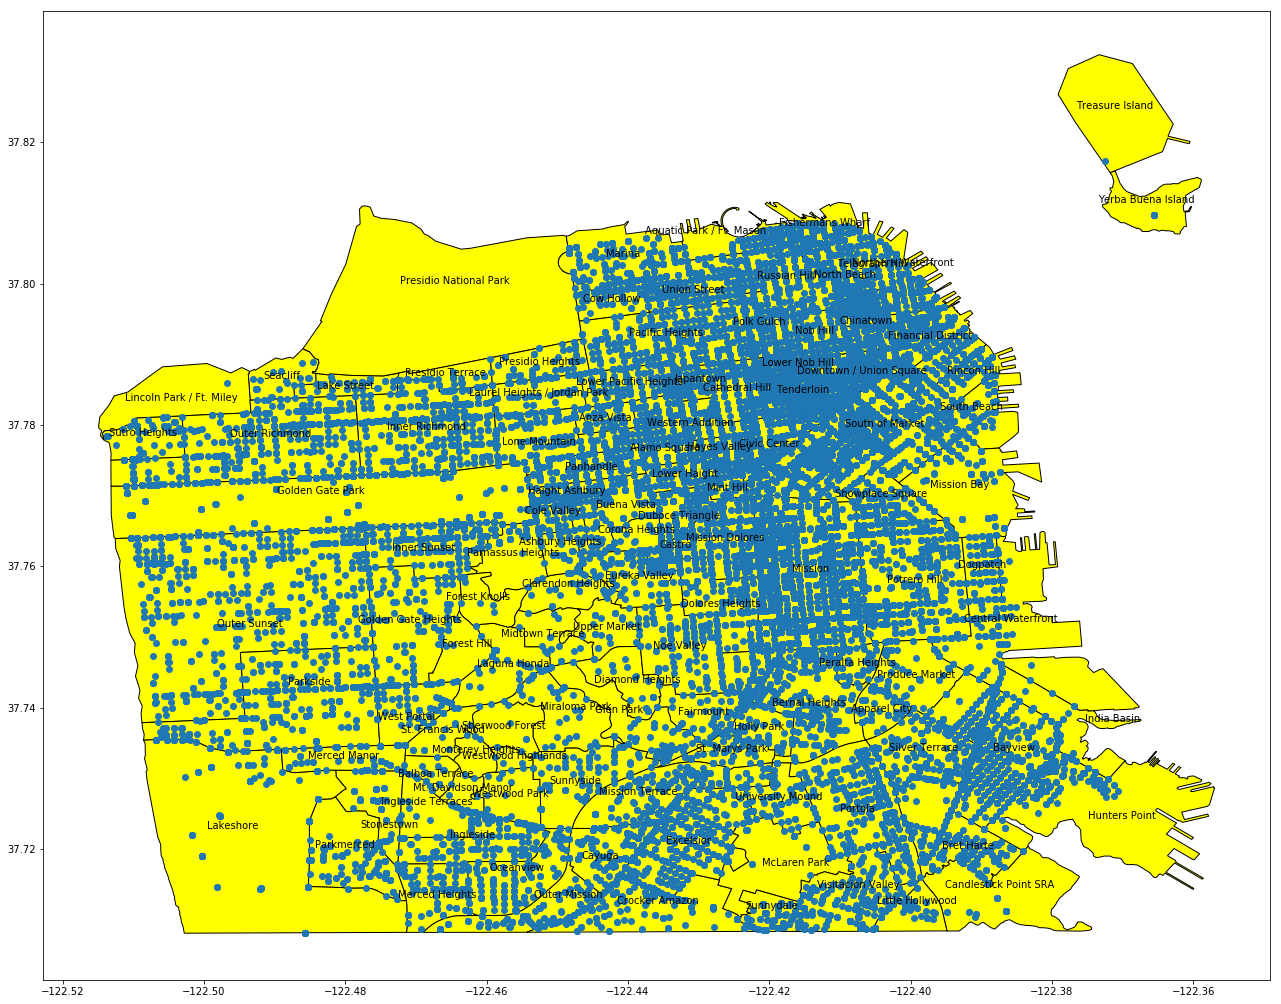

In [136]:
sf = districts
ax = sf.plot(color = "yellow", edgecolor = "black", figsize=(22,22))
#adding labels function
def add_label(row):
    coords = row.geometry.representative_point().coords[0]#
    ax.annotate(row["name"], xy = coords, horizontalalignment = "center")
# Call add_label() on each row.
sf.apply(add_label, axis = 1)
crimes.plot(ax = ax)

### WHAT ARE THE MOST POPULAR CRIMES? ###

Base on the data, I will located where are the common crimes located, and which crime 
are the most common

In [140]:
crimes = crimes[crimes["district"] != "None"]
crimCatFreq = crimes.groupby(['district', 'Category'], as_index= False).count()
crimCatFreq = crimCatFreq[["district", "Category", "IncidntNum"]]
crimCatFreq.rename(columns={"IncidntNum": "Frequency"}, inplace = True)
crimCatFreq.sort_values(by="Frequency", ascending=False, inplace=True)
categoryFrequency=crimCatFreq
crimCatFreq.head(5)

,district,Category,Frequency
1838,South of Market,LARCENY/THEFT,1995
1193,Mission,OTHER OFFENSES,1136
1843,South of Market,OTHER OFFENSES,940
1981,Tenderloin,OTHER OFFENSES,789
1188,Mission,LARCENY/THEFT,691


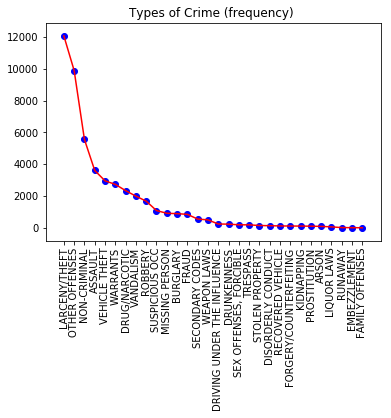

In [150]:
CatFreq = crimes.groupby(['Category'], as_index= False).count()

CatFreq = CatFreq[["Category", "IncidntNum"]]
CatFreq.rename(columns={"IncidntNum": "Frequency"}, inplace = True)
CatFreq.sort_values(by="Frequency", ascending=False, inplace=True)
CatFreq = CatFreq.iloc[0:30,]
CatFreq.head()
length = [i for i in range(0,len(CatFreq))]
plt.plot(length,CatFreq["Frequency"], color="red")
plt.title("Types of Crime (frequency) ")
plt.xticks(length, CatFreq["Category"], rotation='vertical')
plt.scatter(length, CatFreq["Frequency"], color="blue")
plt.show()

Analizing the data we can see that this is an decreasing graph where<br>
it is representing the numbers of occurrences on each different types of crime<br>
Family offences appearence to be one of the lowest crimes<br>
while larceny/theft is one of the highest crimes and high probability<br>
of occurrency in that specific territory

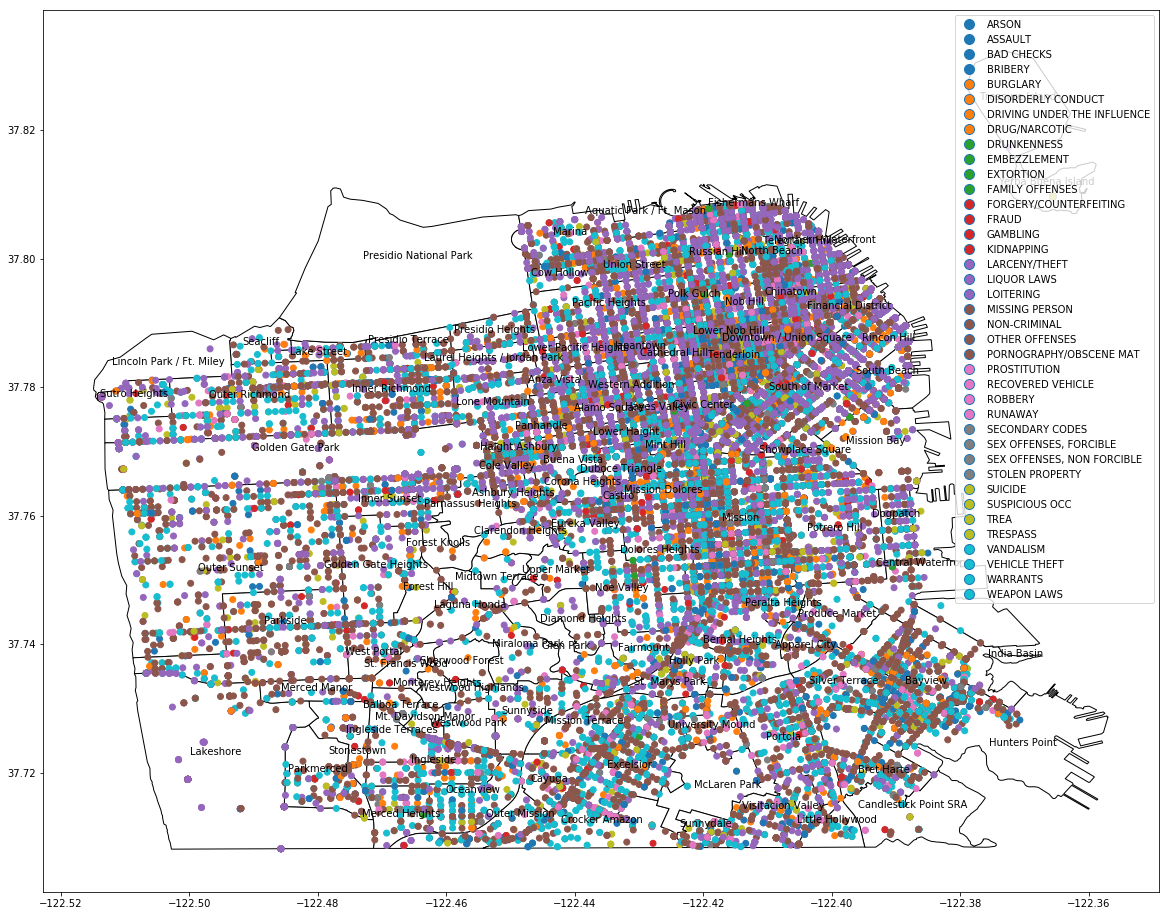

In [153]:
sf = districts
ax = sf.plot(color = "white", edgecolor = "black", figsize=(20,20))
# mission.plot(edgecolor = "black", color = "#ad7fa8")
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["name"], xy = coords, horizontalalignment = "center")    
sf.apply(add_label, axis = 1)
crimes.plot(ax = ax, column="Category", legend=True)

The graph above give as a clear visual representation <br>
we can see that the crimes that are more common and happen <br>
more frequency are located on the right side where there are <br>
the financial district, nightclubs, downtwon, etc<br>
so we can say that crimes trend to happen in places there <br>
were are more money movements and popular places<br>

### HOUSE PRICE AND CRIME ARE RELATED? ###

We see that in places where there are most industries and money,
usually there are more crime. so we gonna see if there is a 
relationship

In [155]:
area = pd.read_sql("SELECT * from zillow", data)
zillow=area
print(zillow.shape)
zillow.head()

(6500, 6)


,RegionName,Date,ZriPerSqft_AllHomes,MedianSoldPricePerSqft_AllHomes,PriceToRentRatio_AllHomes,Turnover_AllHomes
0,94109,2010-11-01 00:00:00,3.156,675.1913,19.14,6.0771
1,94110,2010-11-01 00:00:00,2.566,599.6785,18.10,5.4490
2,94122,2010-11-01 00:00:00,2.168,495.4432,17.99,2.4198
3,94080,2010-11-01 00:00:00,1.666,369.5538,18.31,3.8757
4,94112,2010-11-01 00:00:00,2.322,422.4538,14.44,3.1288


In [156]:
#postal = gpd.read_file("cb_2016_us_zcta510_500k.shp")
post=gpd.read_file('/Users/macbook/STA141B/141b-hw5--rickalarcon/cb_2016_us_zcta510_500k/cb_2016_us_zcta510_500k.shp')
print(post.shape)
post.head() #postal

(33144, 6)


,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [157]:
uniqarea = pd.unique(zillow["RegionName"])
uniqarea = uniqarea.astype(str)
uniqarea

array(['94109', '94110', '94122', '94080', '94112', '94115', '94117',
       '94121', '94102', '94118', '94114', '94107', '94116', '94123',
       '94103', '94131', '94133', '94134', '94132', '94124', '94127',
       '94108', '94105', '94158', '94111', '94104'], dtype='<U21')

In [159]:
postal=post
postal = postal[postal["ZCTA5CE10"].isin(uniqueRegion)]
postal.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
102,94102,8600000US94102,94102,1732307,0,"POLYGON ((-122.429929 37.777909, -122.426829 3..."
1041,94116,8600000US94116,94116,6699045,97204,"POLYGON ((-122.510297 37.764073, -122.509833 3..."
1499,94158,8600000US94158,94158,1703879,1342698,"POLYGON ((-122.397866 37.772323, -122.396381 3..."
1893,94117,8600000US94117,94117,4373059,1625,"POLYGON ((-122.477297 37.766069, -122.473124 3..."
2312,94104,8600000US94104,94104,200857,0,"POLYGON ((-122.404613 37.793565, -122.401315 3..."


In [160]:
crimesPostal = crimes.copy()
crimesPostal = crimesPostal.iloc[0:6500,]
lnglatPostal = [geom.Point(x) for x in zip(crimesPostal.Lon, crimesPostal.Lat)]
crimesPostal = gpd.GeoDataFrame(crimesPostal, geometry = lnglatPostal)
postalNames = []
found = False
for point in crimesPostal["geometry"]:
    for j in range(len(postal["geometry"])):
        if(postal["geometry"].iloc[j,].contains(point)):
            postalNames.append(postal["ZCTA5CE10"].iloc[j,])
            found = True
            break
    if(found == True):
        found = False
    else:
        postalNames.append("None")
crimesPostal["postal"] = postalNames
crimesPostal.head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat,geometry,district,postal
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,POINT (-122.42158168137 37.7617007179518),Mission Dolores,94110
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,POINT (-122.414406029855 37.7841907151119),Tenderloin,94109
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,POINT (-122.414406029855 37.7841907151119),Tenderloin,94109
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,POINT (-122.414406029855 37.7841907151119),Tenderloin,94109
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27 19:00:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,POINT (-122.431118543788 37.8004687042875),Marina,94123


In [107]:
postalCrimeFrequency = crimesPostal.groupby(['postal'], as_index= False).count()
postalCrimeFrequency = postalCrimeFrequency[["postal", "district"]]
postalCrimeFrequency.rename(columns={"district": "Frequency"}, inplace = True)
postalCrimeFrequency = postalCrimeFrequency[postalCrimeFrequency["postal"] != "None"].astype(int)
postalCrimeFrequency.head()

,postal,Frequency
0,94102,774
1,94103,911
2,94104,48
3,94105,109
4,94107,215


Text(0.5,1,'Crime in San Francisco')

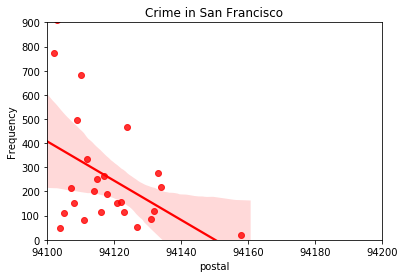

In [168]:
postalFreqPlot = sns.regplot(x="postal", y="Frequency", data=postalCrimeFrequency, color="red")
postalFreqPlot.set(ylim=(0, 900))
postalFreqPlot.set(xlim=(94100, 94200))
postalFreqPlot.set_title("Crime in San Francisco")

/Users/macbook/anaconda3/envs/FORGE/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Price of Homes in SF Postal Area')

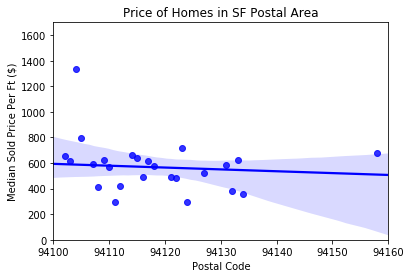

In [183]:
zilprice = zillow[["RegionName", "MedianSoldPricePerSqft_AllHomes"]]
zilprice.dropna(inplace=True)
zilprice.head()
zilprice = zilprice.groupby(by=['RegionName'], as_index=False).median()
PricePlot = sns.regplot(x="RegionName", y="MedianSoldPricePerSqft_AllHomes", data=zilprice,color="blue")
PricePlot.set(ylim=(0, 1700))
PricePlot.set(xlim=(94100, 94160))
PricePlot.set_xlabel("Postal Code")
PricePlot.set_ylabel("Median Sold Price Per Ft ($)")
PricePlot.set_title("Price of Homes in SF Postal Area")

Text(0.5,1,'Crimes vs.House Price in SF')

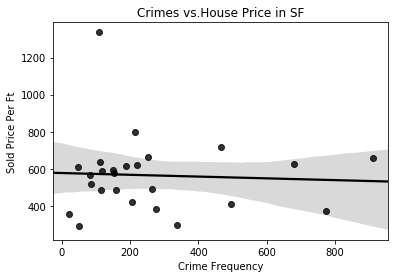

In [182]:
zillowPriceCrime = zillowPrice.copy()
zillowPriceCrime["CrimeFreq"] = postalCrimeFrequency["Frequency"]
zillowPriceCrimePlot = sns.regplot(x="CrimeFreq", y="MedianSoldPricePerSqft_AllHomes", data=zillowPriceCrime,color="black")
zillowPriceCrimePlot.set_xlabel("Crime Frequency")
zillowPriceCrimePlot.set_ylabel("Sold Price Per Ft")
zillowPriceCrimePlot.set_title("Crimes vs.House Price in SF")

### Are noise complaints and mobile food vendors related? ###

### What are the best times and places to find food trucks? ###

I gonna check where are the food trunks most likely to be, also I gonna compare what locations it is most likely to be

In [113]:
parks = pd.read_sql("SELECT * from parks", data)

#Check structure of dataset
print(parks.shape)
parks.iloc[0:10,]

(229, 6)


,Name,Type,Acreage,ParkID,Lat,Lon
0,10TH AVE/CLEMENT MINI PARK,Mini Park,0.66,156,37.781844,-122.468099
1,15TH AVENUE STEPS,Mini Park,0.26,185,37.759565,-122.472268
2,24TH/YORK MINI PARK,Mini Park,0.12,51,37.753060,-122.408575
3,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,0.82,194,37.743602,-122.435236
4,ADAM ROGERS PARK,Neighborhood Park or Playground,2.74,46,37.731016,-122.383855
5,ALAMO SQUARE,Neighborhood Park or Playground,12.70,117,37.776349,-122.434674
6,ALICE CHALMERS PLAYGROUND,Neighborhood Park or Playground,1.68,25,37.709827,-122.446651
7,ALICE MARBLE TENNIS COURTS,Neighborhood Park or Playground,0.84,151,37.801428,-122.420343
8,ALIOTO MINI PARK,Mini Park,0.16,62,37.758902,-122.418217
9,ALLYNE PARK,Neighborhood Park or Playground,0.75,131,37.797461,-122.427600


In [114]:
lnglatParks= [geom.Point(x) for x in zip(parks.Lon, parks.Lat)]
parks = gpd.GeoDataFrame(parks, geometry = lnglatParks)
districtNames = []
found = False
for point in parks["geometry"]:
    for j in range(len(districts["geometry"])):
        if(districts["geometry"].iloc[j,].contains(point)):
            districtNames.append(districts["name"].iloc[j,])
            found = True
            break
    if(found == True):
        found = False
    else:
        districtNames.append("None")
parks["district"] = districtNames
parks = parks[parks["Lon"] < -120]
parks = parks[parks["Lat"] > 37.7]
parks.head()

,Name,Type,Acreage,ParkID,Lat,Lon,geometry,district
0,10TH AVE/CLEMENT MINI PARK,Mini Park,0.66,156,37.781844,-122.468099,POINT (-122.46809908 37.78184397),Inner Richmond
1,15TH AVENUE STEPS,Mini Park,0.26,185,37.759565,-122.472268,POINT (-122.47226783 37.75956493),Golden Gate Heights
2,24TH/YORK MINI PARK,Mini Park,0.12,51,37.753060,-122.408575,POINT (-122.40857543 37.75306042),Mission
3,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,0.82,194,37.743602,-122.435236,POINT (-122.43523589 37.74360211),Noe Valley
4,ADAM ROGERS PARK,Neighborhood Park or Playground,2.74,46,37.731016,-122.383855,POINT (-122.38385466 37.73101645),Bayview


In [117]:
mobileFoodLocations = pd.read_sql("SELECT * from mobile_food_locations", data)
mobileFoodPermits = pd.read_sql("SELECT * from mobile_food_permits", data)
mobileFoodSchedule = pd.read_sql("SELECT * from mobile_food_schedule", data)
lnglatFood= [geom.Point(x) for x in zip(mobileFoodLocations.Longitude, mobileFoodLocations.Latitude)]
mobileFoodLocations = gpd.GeoDataFrame(mobileFoodLocations, geometry = lnglatFood)

districtNames = []

found = False

for point in mobileFoodLocations["geometry"]:
    for j in range(len(districts["geometry"])):
        if(districts["geometry"].iloc[j,].contains(point)):
            districtNames.append(districts["name"].iloc[j,])
            found = True
            break
    if(found == True):
        found = False
    
    else:
        districtNames.append("None")
        
mobileFoodLocations["district"] = districtNames
mobileFoodLocations = mobileFoodLocations[mobileFoodLocations["Longitude"] < 0]

mobileFoodLocations.head()

,locationid,LocationDescription,Address,Latitude,Longitude,geometry,district
0,762182,TOWNSEND ST: 05TH ST to 06TH ST (400 - 499),444 TOWNSEND ST,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388),South of Market
1,437211,MISSOURI ST: 20TH ST to SIERRA ST (500 - 630),555 MISSOURI ST,37.759304,-122.395902,POINT (-122.395902231236 37.7593037663834),Potrero Hill
2,765880,17TH ST: SAN BRUNO AVE to UTAH ST (2200 - 2299),2222 17TH ST,37.765216,-122.406007,POINT (-122.406006972029 37.7652159489938),Potrero Hill
3,765690,CESAR CHAVEZ ST: EVANS AVE to KANSAS ST (2100 ...,2323 CESAR CHAVEZ ST,37.748801,-122.400552,POINT (-122.400552458785 37.7488013777145),Produce Market
4,751253,FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899),1800 FOLSOM ST,37.767852,-122.416105,POINT (-122.416104892532 37.7678524427181),Mission


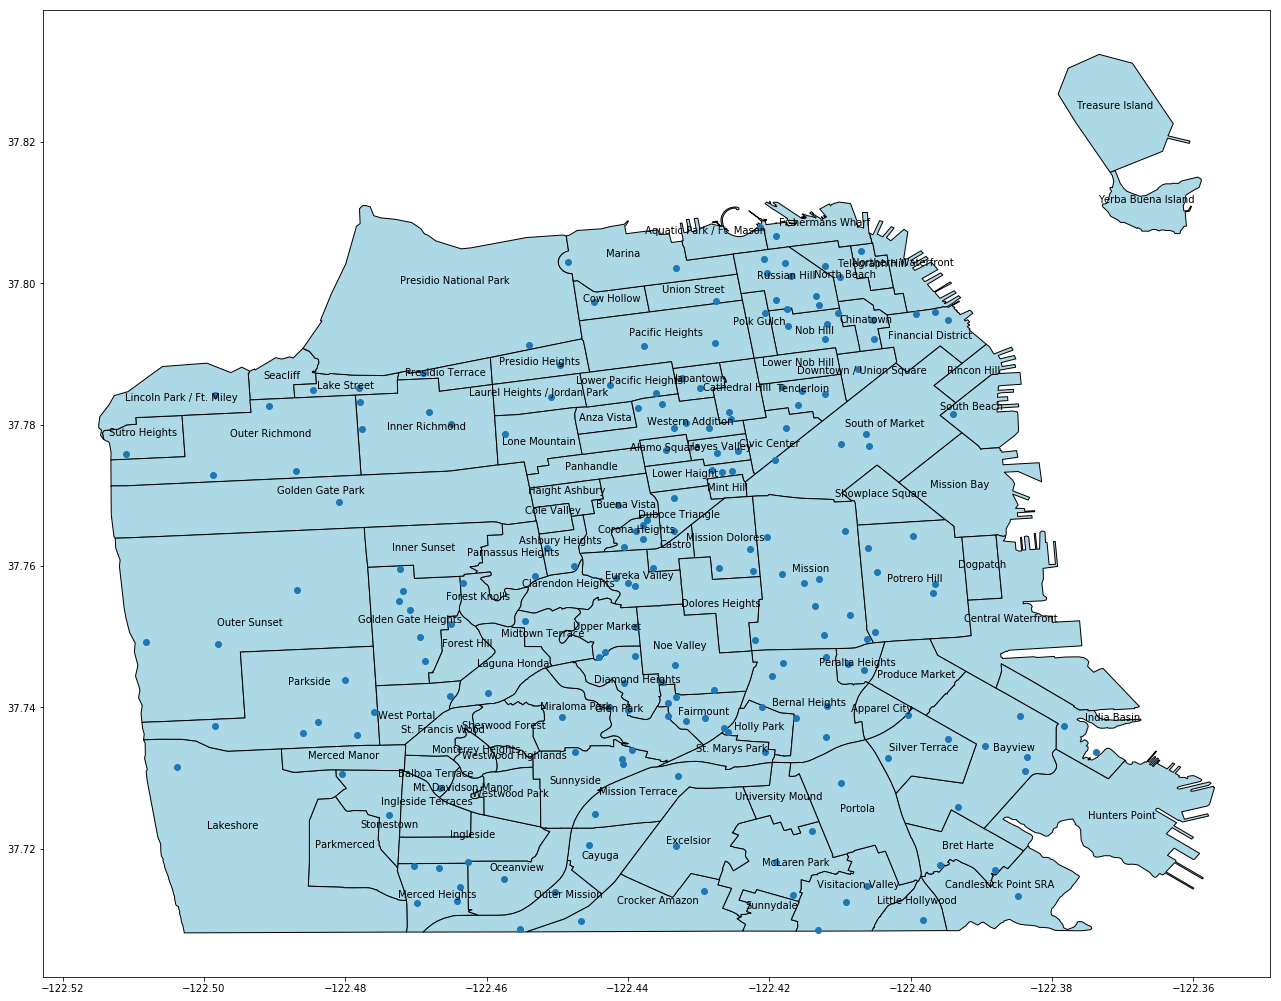

In [175]:
sf = districts
ax = sf.plot(color = "lightblue", edgecolor = "black", figsize=(22,22))
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["name"], xy = coords, horizontalalignment = "center")
sf.apply(add_label, axis = 1)
parksPlot = parks.plot(ax = ax)
parksPlot
# schools.plot(ax = ax, column="GeneralType", legend = True)

The graph above gives us a perfect visual representation of where the food trunks are <br>
of the times and in what park. So we can see that they are located and on what park   <br>
so we can get information of where can we get to taste some good food from that food trunk <br>

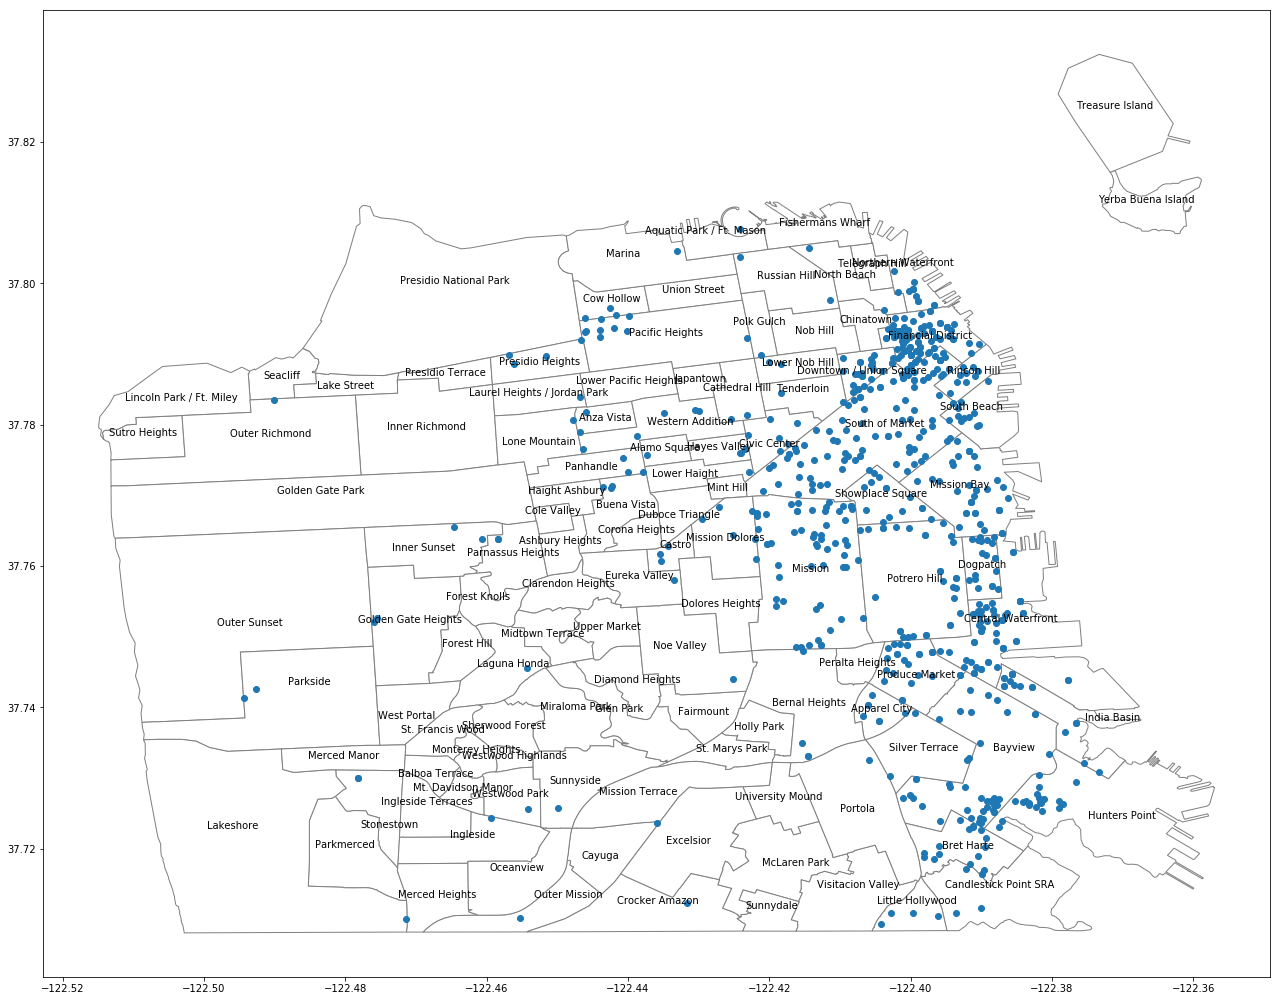

In [186]:
sf = districts
ax = sf.plot(color = "white", edgecolor = "gray", figsize=(22,22),)
def add_name(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["name"], xy = coords, horizontalalignment = "center")
    
sf.apply(add_name, axis = 1)
mobileFoodLocations.plot(ax=ax)

In [ ]:
The graph above let us that the food trunks are locations most frenquent on 
the left side where there are all the movements and companies and entertaiment


In [122]:
import math
parkNames = []
found = False
for i in range(len(mobileFoodLocations["Longitude"])):
    for j in range(len(parks["Lon"])):
        lonDiff = math.fabs(mobileFoodLocations["Longitude"].iloc[i,] - parks["Lon"].iloc[j,])
        latDiff = math.fabs(mobileFoodLocations["Latitude"].iloc[j,] - parks["Lat"].iloc[j,])
        if(lonDiff <= 0.01 and latDiff <= 0.01):
            parkNames.append(parks["Name"].iloc[j,])
            found = True
            break
    if(found == True):
        found = False
    else:
        parkNames.append("None")
mobileFoodLocations["NearParkName"] = parkNames
mobileFoodLocations.head()

,locationid,LocationDescription,Address,Latitude,Longitude,geometry,district,NearParkName
0,762182,TOWNSEND ST: 05TH ST to 06TH ST (400 - 499),444 TOWNSEND ST,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388),South of Market,GENE FRIEND REC CENTER
1,437211,MISSOURI ST: 20TH ST to SIERRA ST (500 - 630),555 MISSOURI ST,37.759304,-122.395902,POINT (-122.395902231236 37.7593037663834),Potrero Hill,JACKSON PLAYGROUND
2,765880,17TH ST: SAN BRUNO AVE to UTAH ST (2200 - 2299),2222 17TH ST,37.765216,-122.406007,POINT (-122.406006972029 37.7652159489938),Potrero Hill,CHINESE RECREATION CENTER
3,765690,CESAR CHAVEZ ST: EVANS AVE to KANSAS ST (2100 ...,2323 CESAR CHAVEZ ST,37.748801,-122.400552,POINT (-122.400552458785 37.7488013777145),Produce Market,FRANKLIN SQUARE
4,751253,FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899),1800 FOLSOM ST,37.767852,-122.416105,POINT (-122.416104892532 37.7678524427181),Mission,BROADWAY TUNNEL WEST MINI PARK


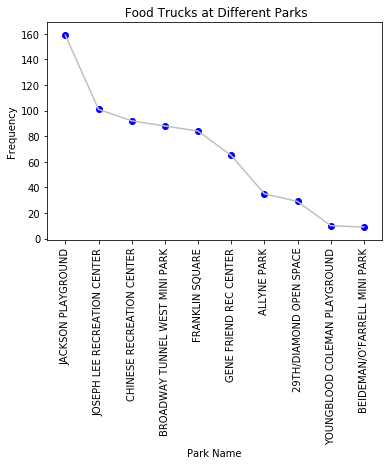

In [184]:
parkFreq = mobileFoodLocations.groupby(['NearParkName'], as_index= False).count()
parkFreq = parkFreq[["NearParkName", "Address"]]
parkFreq.rename(columns={"Address": "Frequency"}, inplace = True)
parkFreq = parkFreq.sort_values(["Frequency"], ascending = False).iloc[0:10,]
parkFreq
#plot#
length = [i for i in range(0,len(parkFreq))]
plt.plot(length,parkFreq["Frequency"], color="silver")
plt.scatter(length, parkFreq["Frequency"], color="blue")
plt.xticks(length, parkFreq["NearParkName"], rotation='vertical')
plt.title(" Food Trucks at Different Parks")
plt.ylabel("Frequency")
plt.xlabel("Park Name")
plt.show()

Analizing the graph above, we have a clearn visual representation<br>
of two diferent variables and how they are related with each other<br>
We organazid the graph from the locations that have most of the <br>
food trunk visit to the one who has the less food trunk visit<br>
the location park who has the most food trunk visit is jackson park<br>
while one of the locations that have the least visit is Beideman park<br>